In [1]:
import math
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

import matplotlib.pyplot as plt
%matplotlib inline

random_seed = 42

In [13]:
data = pd.read_csv("../data/featured/data.csv", sep=',')

Xdata = data.drop('teamA_win', axis=1)
ydata = data.teamA_win

Xdata.columns

Index(['teamA', 'teamB', 'tournament', 'year', 'month', 'day', 'diff_GP',
       'ratio_GP', 'diff_AGT', 'ratio_AGT', 'diff_KD', 'ratio_KD', 'diff_CKPM',
       'ratio_CKPM', 'diff_GPR', 'ratio_GPR', 'diff_GSPD', 'ratio_GSPD',
       'diff_EGR', 'ratio_EGR', 'diff_MLR', 'ratio_MLR', 'diff_GD15',
       'ratio_GD15', 'diff_FB%', 'ratio_FB%', 'diff_FT%', 'ratio_FT%',
       'diff_F3T%', 'ratio_F3T%', 'diff_PPG', 'ratio_PPG', 'diff_HLD%',
       'ratio_HLD%', 'diff_GRB%', 'ratio_GRB%', 'diff_FD%', 'ratio_FD%',
       'diff_DRG%', 'ratio_DRG%', 'diff_ELD%', 'ratio_ELD%', 'diff_FBN%',
       'ratio_FBN%', 'diff_BN%', 'ratio_BN%', 'diff_LNE%', 'ratio_LNE%',
       'diff_JNG%', 'ratio_JNG%', 'diff_WPM', 'ratio_WPM', 'diff_CWPM',
       'ratio_CWPM', 'diff_WCPM', 'ratio_WCPM', 'diff_winrate%',
       'ratio_winrate%'],
      dtype='object')

In [14]:
Xtrain, Xval, ytrain, yval = train_test_split(Xdata, ydata, test_size=0.4, random_state=random_seed)

In [15]:
clf = DecisionTreeClassifier(max_depth=15, random_state=random_seed)
clf.fit(Xtrain, ytrain)

,criterion,'gini'
,splitter,'best'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [16]:
print('accuracy score (train): {0:.6f}'.format(metrics.accuracy_score(ytrain, clf.predict(Xtrain))))
print('accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, clf.predict(Xval))))

accuracy score (train): 0.997912
accuracy score (val): 0.589063


In [17]:
val_acc = []
train_acc = []
depths = range(1,101)
for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state = random_seed)
    clf.fit(Xtrain, ytrain)
    train_acc.append(metrics.accuracy_score(ytrain, clf.predict(Xtrain)))
    val_acc.append(metrics.accuracy_score(yval, clf.predict(Xval)))

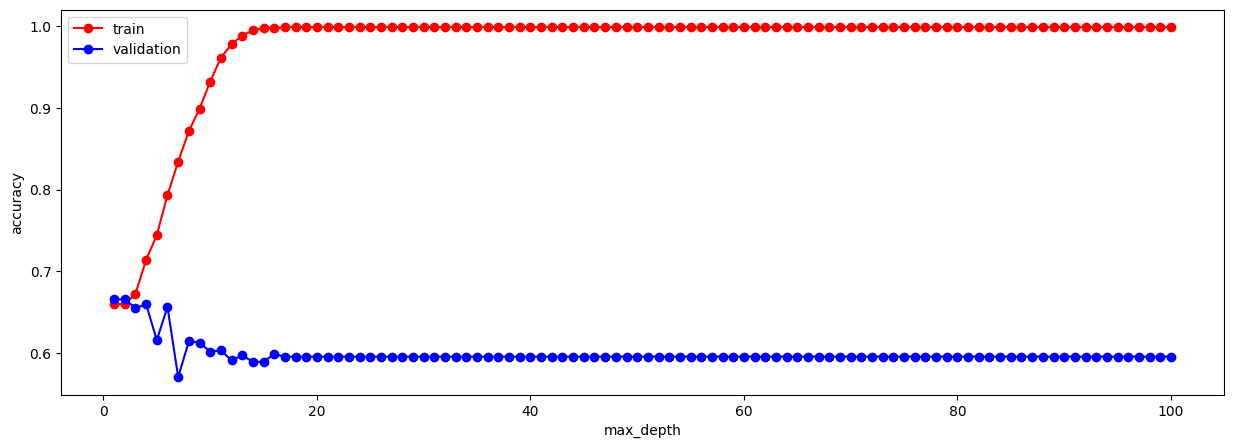

In [18]:
plt.figure(figsize=(15,5))
plt.plot(depths, train_acc,'or-') #o: body, r: barva, -: spojení bodů linkou
plt.plot(depths, val_acc,'ob-')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend(['train', 'validation'])

In [19]:
optimal_depth = np.argmax(val_acc) + 1
print(f"optimal depth: {optimal_depth}")
clf = DecisionTreeClassifier(max_depth=optimal_depth, random_state = random_seed)
clf.fit(Xtrain, ytrain)

print('accuracy score (val): {0:.6f}'.format(metrics.accuracy_score(yval, clf.predict(Xval))))

optimal depth: 1
accuracy score (val): 0.665625


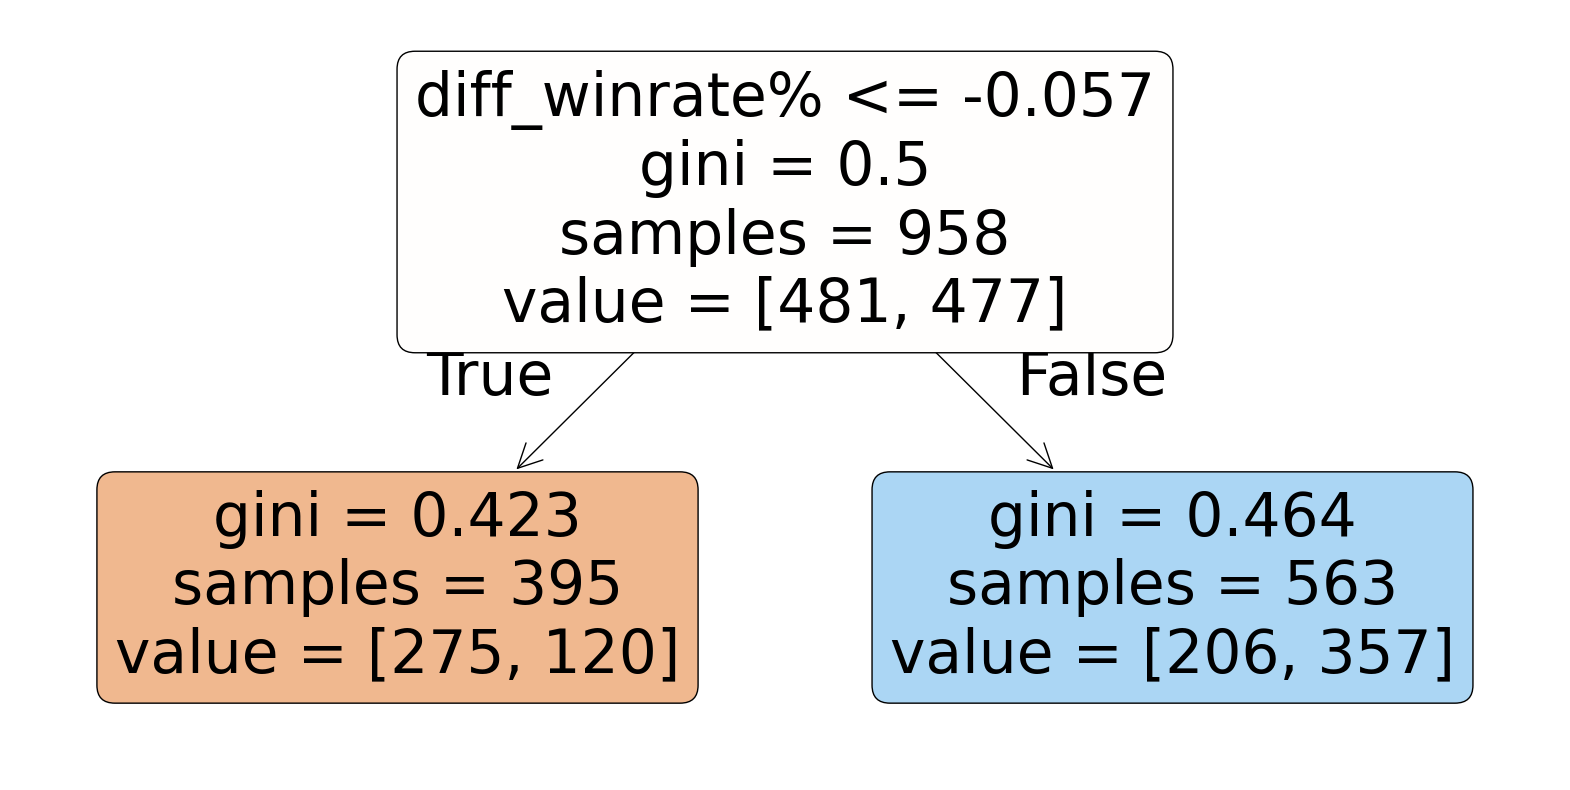

In [20]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
tree.plot_tree(
    clf,
    feature_names=list(Xdata.columns),
    filled=True,
    rounded=True
)
plt.show()

In [6]:
data = pd.read_csv("../scrap/golgg/data/intermediate/CBLOL Split 1 2023_matches.csv", sep=',')

In [14]:
tournaments_2023 = [
'LPL Spring 2023',
'LPL Spring Playoffs 2023',
'LPL Summer 2023',
'LPL Summer Playoffs 2023',
'LPL Regional Finals 2023',
'LEC Winter Groups 2023',
'LEC Winter Playoffs 2023',
'LEC Spring Season 2023',
'LEC Spring Groups 2023',
'LEC Spring Playoffs 2023',
'LEC Summer 2023',
'LEC Summer Groups 2023',
'LEC Summer Playoffs 2023',
'LEC Season Finals 2023',
'LCK Spring 2023',
'LCK Spring Playoffs 2023',
'LCK Summer 2023',
'LCK Summer Playoffs 2023',
'LCK Regional Finals 2023',
'LCS Spring 2023',
'LCS Spring Playoffs 2023',
'LCS Summer 2023',
'LCS Championship 2023',
'CBLOL Split 1 2023',
'CBLOL Split 1 Playoffs 2023',
'CBLOL Split 2 2023',
'CBLOL Split 2 Playoffs 2023',
'LLA Opening 2023',
'LLA Opening Playoffs 2023',
'LLA Closing 2023',
'LLA Closing Playoffs 2023',
'PCS Spring 2023',
'PCS Spring Playoffs 2023',
'PCS Summer 2023',
'PCS Summer Playoffs 2023',
'VCS Spring 2023',
'VCS Spring Playoffs 2023',
'VCS Summer 2023',
'VCS Summer Playoffs 2023',
'LJL Spring 2023',
'LJL Spring Playoffs 2023',
'LJL Summer 2023',
'LJL Summer Playoffs 2023',
]

In [15]:
data_2023 = pd.DataFrame()
for t in tournaments_2023:
    path = f"../scrap/golgg/data/intermediate/{t}_matches.csv"
    data = pd.read_csv(path, sep=',')
    data['tournament'] = t
    data_2023 = pd.concat([data_2023, data], ignore_index=True)


In [19]:
data_2023 = data_2023[data_2023['scoreA'] != data_2023['scoreB']]
data_2023['teamA_win'] = (data_2023['scoreA'] > data_2023['scoreB']).astype(int)
data_2023.drop(columns=['scoreA','scoreB'], inplace=True)

In [20]:
data_2023

,teamA,teamB,date,tournament,teamA_win
0,Weibo Gaming,Rare Atom,2023-03-26,LPL Spring 2023,1
1,Anyone s Legend,TT,2023-03-26,LPL Spring 2023,0
2,Team WE,Ninjas in Pyjamas,2023-03-25,LPL Spring 2023,1
3,JD Gaming,Ultra Prime,2023-03-25,LPL Spring 2023,1
4,Bilibili Gaming,OMG,2023-03-25,LPL Spring 2023,0
...,...,...,...,...,...
1528,Crest Gaming Act,Sengoku Gaming,2023-08-04,LJL Summer Playoffs 2023,0
1529,Burning Core,AXIZ,2023-07-30,LJL Summer Playoffs 2023,0
1530,Sengoku Gaming,V3 Esports,2023-07-29,LJL Summer Playoffs 2023,1
1531,SoftBank Hawks Gaming,FENNEL,2023-07-23,LJL Summer Playoffs 2023,1
